In [ ]:
from google.colab import files
files.upload()

Saving PCA_IRISH.csv to PCA_IRISH.csv


{'PCA_IRISH.csv': b'\xef\xbb\xbfID,A,B,C,Species\r\n0,-0.630361249,0.111556258,-0.016992912,Iris-setosa\r\n1,-0.62354631,-0.100313199,-0.047120124,Iris-setosa\r\n2,-0.669792802,-0.047220057,0.021647739,Iris-setosa\r\n3,-0.654633051,-0.098791275,0.025214146,Iris-setosa\r\n4,-0.648263265,0.137557689,0.016812552,Iris-setosa\r\n5,-0.534057,0.293223042,0.026736471,Iris-setosa\r\n6,-0.656395887,0.014921939,0.093698079,Iris-setosa\r\n7,-0.625643957,0.061075319,-0.012269568,Iris-setosa\r\n8,-0.676525845,-0.196482315,0.038131645,Iris-setosa\r\n9,-0.646137172,-0.06324223,-0.059753692,Iris-setosa\r\n10,-0.596654863,0.220941913,-0.049753282,Iris-setosa\r\n11,-0.638828681,0.036595812,0.026259239,Iris-setosa\r\n12,-0.662304799,-0.111542611,-0.052716474,Iris-setosa\r\n13,-0.752700136,-0.166744846,0.049968696,Iris-setosa\r\n14,-0.598993148,0.384079343,-0.083766185,Iris-setosa\r\n15,-0.549943265,0.518967671,0.039334685,Iris-setosa\r\n16,-0.575826838,0.297584158,0.031364219,Iris-setosa\r\n17,-0.60341635

In [ ]:
import warnings as war
war.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set(style="white", color_codes = True)

In [ ]:
data = pd.read_csv("PCA_IRISH.csv")
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
data.isnull().sum()

ID         0
A          0
B          0
C          0
Species    0
dtype: int64

In [ ]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
x = data.drop(['ID','Species'],axis=1)

print(x)

            A         B         C
0   -0.630361  0.111556 -0.016993
1   -0.623546 -0.100313 -0.047120
2   -0.669793 -0.047220  0.021648
3   -0.654633 -0.098791  0.025214
4   -0.648263  0.137558  0.016813
..        ...       ...       ...
145  0.551755  0.058990  0.085968
146  0.406278 -0.172227 -0.003916
147  0.447293  0.036996  0.049336
148  0.489218  0.149121  0.238719
149  0.312079 -0.031151  0.118672

[150 rows x 3 columns]


In [ ]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
len(x)

150

In [ ]:
len(y)

150

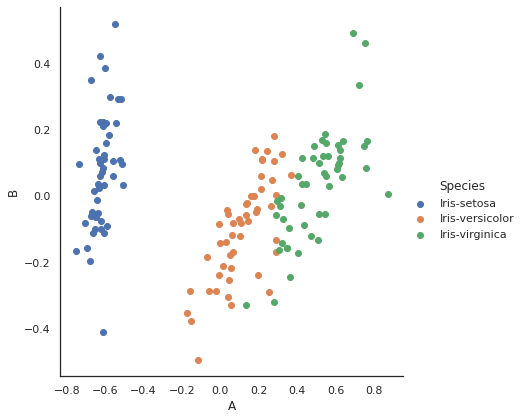

In [ ]:
sns.FacetGrid(data, hue="Species",height=6).map(plt.scatter, "A","B").add_legend()

**Converted Categorical Data to Numrecial Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
len(y)

150

**Training And Testing Data Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [ ]:
print(x_train)

            A         B         C
137  0.406828  0.060657  0.028793
84   0.109522 -0.081686  0.148510
27  -0.608105  0.122161 -0.037993
127  0.314821 -0.005581  0.081300
132  0.543316 -0.055382  0.087505
..        ...       ...       ...
9   -0.646137 -0.063242 -0.059754
103  0.417634 -0.027520  0.019553
67  -0.001453 -0.141309 -0.095317
117  0.750875  0.461616 -0.043553
47  -0.671164 -0.060005  0.040334

[120 rows x 3 columns]


In [ ]:
len(x_test)

30

In [ ]:
print(y_train)

[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]


In [ ]:
len(y_train)

120

In [ ]:
print(y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
len(y_test)

30

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
predicted = regression.predict(x_test)

In [ ]:
predicted

array([ 2.10341935,  0.97288303, -0.15404809,  1.77900854, -0.0422451 ,
        2.2494809 , -0.01218937,  1.32490302,  1.28977469,  1.1292751 ,
        1.47584772,  1.3011923 ,  1.17174298,  1.34528619,  1.30499112,
       -0.08218657,  1.34913129,  1.1741011 ,  0.0573603 ,  0.00229633,
        1.79912792,  1.36347519,  0.03386415,  0.01767829,  1.60718252,
       -0.11722235,  0.12485897,  1.16374409,  0.9080496 ,  0.11558629])

In [ ]:
regression.score(x_test,y_test)

0.9053579083570008

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test,predicted)*100

In [ ]:
score

90.53579083570008

**Performing Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter = 500, random_state = 21)

In [ ]:
lrc.fit(x_train,y_train)

LogisticRegression(max_iter=500, random_state=21)

In [ ]:
y_pred = lrc.predict(x_test)
print(y_pred)

[2 1 0 2 0 2 0 2 1 1 1 2 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

90.0

In [ ]:
prediction = lrc.predict([[5.7, 2.6, 3.5]])
print(prediction)

[2]


**COnfusion matrix**

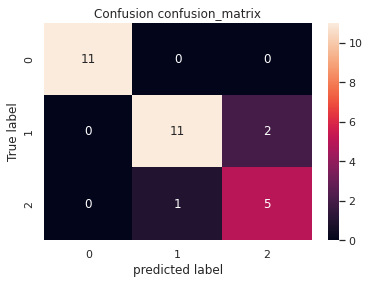

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat, annot=True)
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.title("Confusion confusion_matrix")
plt.show()

**Plotting**

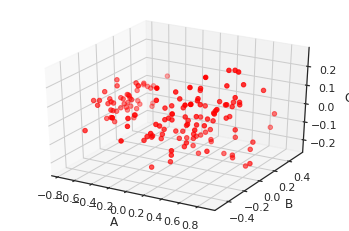

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=20
ax.scatter(data["A"],data["B"],data["C"],color="red")
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_zlabel("C")
plt.show()